In [2]:
import pandas as pd

In [4]:
import pandas as pd

!rm -rf "/content/Fake-News-Detection-Text-Classification"
!git clone 'https://github.com/shariqfz/Fake-News-Detection-Text-Classification.git'

fake_news_data = pd.read_csv("/content/Fake-News-Detection-Text-Classification/preprocessed_data/stemmed_and_stopword_removed_combined_set.csv").sample(10000)

Cloning into 'Fake-News-Detection-Text-Classification'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 88 (delta 32), reused 18 (delta 3), pack-reused 9
Receiving objects: 100% (88/88), 142.44 MiB | 14.30 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (16/16), done.


In [9]:
fake_news_data.head()

,text,Label
0,us budget fight loom republican flip fiscal sc...,1.0
1,us militari accept transgend recruit monday pe...,1.0
2,senior us republican senat let mr mueller hi j...,1.0
3,fbi russia probe help australian diplomat tipo...,1.0
4,trump want postal servic charg much amazon shi...,1.0


In [10]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Num GPUs Available:  0


In [5]:
from sklearn.model_selection import train_test_split
X=fake_news_data['text']
Y=fake_news_data['Label']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state = 1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn import svm
import pandas as pd

# Assuming you have a DataFrame fake_news_data
X = fake_news_data['text']
Y = fake_news_data['Label']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Replace NaN values with an empty string
x_train = x_train.fillna('')  # You can choose another placeholder if needed
x_test = x_test.fillna('')    # You can choose another placeholder if needed

# Initialize CountVectorizer
vc = CountVectorizer()

# Fit and transform both training and testing sets
features = vc.fit_transform(x_train)
features_test = vc.transform(x_test)

# Perform imputation on y_train and y_test
imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_imputed = imputer.transform(y_test.to_numpy().reshape(-1, 1))

# Initialize and train the SVM model
model = svm.SVC()
model.fit(features, y_train_imputed)

# Check the accuracy on the testing set
accuracy = model.score(features_test, y_test_imputed)
print(f'Accuracy: {round(accuracy * 100, 2)}%')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 96.47%


Misclassified instances:
                                                    Text  Actual_Label  \
44289  north korea trump reckless could trigger allou...           0.0   
37014  hellbent convict pentagon third attempt convic...           0.0   
37317  suprem court rule trump travel ban anoth winne...           0.0   
33217  trump un ambassador nikki haley warn un member...           0.0   
1643   australian women go pro back invest boom lisa ...           1.0   
...                                                  ...           ...   
40443  republican senat send letter fbi director ques...           0.0   
39788  break new violent g protest trap melania hotel...           0.0   
32742  hyster whi trump said report im presid read mo...           0.0   
35612  obamabot congresswoman isi behead justifi us a...           0.0   
2201   presid trump reelect campaign releas televis a...           1.0   

       Predicted_Label  
44289              1.0  
37014              1.0  
37317      

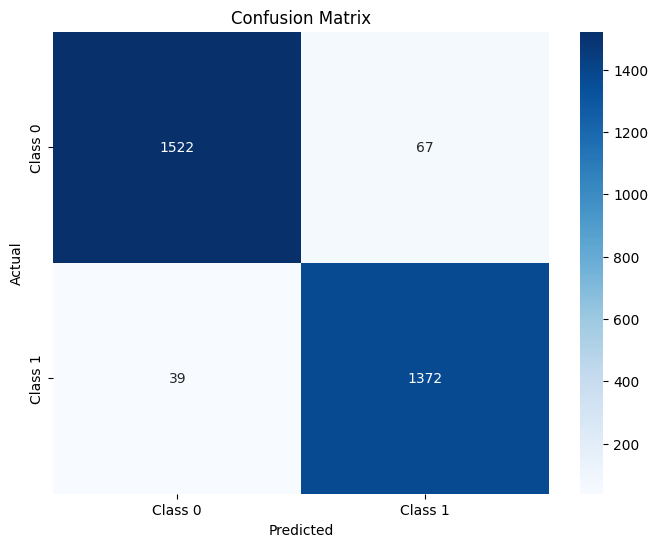

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels for the test set
predicted_labels = model.predict(features_test)

# Find misclassified instances
misclassified_data = pd.DataFrame({'Text': x_test, 'Actual_Label': y_test_imputed.flatten(), 'Predicted_Label': predicted_labels})
misclassified_data = misclassified_data[misclassified_data['Actual_Label'] != misclassified_data['Predicted_Label']]

# Append misclassified instances to the DataFrame
fake_news_data_misclassified = fake_news_data.copy()
fake_news_data_misclassified['Misclassified'] = False
fake_news_data_misclassified.loc[fake_news_data_misclassified.index.isin(misclassified_data.index), 'Misclassified'] = True

# Print misclassified instances
print("Misclassified instances:")
print(misclassified_data)

# Compute precision, recall, and f1 score
precision = precision_score(y_test_imputed, predicted_labels, average='binary')
recall = recall_score(y_test_imputed, predicted_labels, average='binary')
f1 = f1_score(y_test_imputed, predicted_labels, average='binary')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_imputed, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test_imputed, predicted_labels, target_names=['Class 0', 'Class 1'])
print('Classification Report:')
print(class_report)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
